# **1. DATA PREPROCESSING**

In [93]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [94]:
from google.colab import drive
import os

drive.mount('/content/drive')
directory=os.getcwd()+'/drive/MyDrive/FDM'
dataset = directory+'/stroke_prediction_original.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Load the dataset

data = pd.read_csv(dataset)
print(data.head())
print("Data shape: {}".format(data.shape))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Data shape: (5110, 12)


In [96]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [97]:
# Check how many missing values exist in each variable.

miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


In [98]:
# Handling Missing Values
# Replace missing values in variable 'bmi' with its mean

clean_data = data['bmi']=data['bmi'].fillna(data['bmi'].mean())

miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable bmi		: 0.00%
Data shape: (5110, 12)


In [99]:
# Drop 'id' column

clean_data = data.drop('id', axis=1)

In [100]:
# Fixing attribute names

data.loc[data['work_type'] == 'Private', 'work_type'] = 'Private Sector'
data.loc[data['work_type'] == 'children', 'work_type'] = 'Children'
data.loc[data['work_type'] == 'Govt_job', 'work_type'] = 'Government Sector'
data.loc[data['work_type'] == 'Never_worked', 'work_type'] = 'Never Worked'

data.loc[data['smoking_status'] == 'never smoked', 'smoking_status'] = 'Never Smoked'
data.loc[data['smoking_status'] == 'formerly smoked', 'smoking_status'] = 'Formerly Smoked'
data.loc[data['smoking_status'] == 'smokes', 'smoking_status'] = 'Smokes'

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private Sector,Urban,228.69,36.600000,Formerly Smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,Never Smoked,1
2,31112,Male,80.0,0,1,Yes,Private Sector,Rural,105.92,32.500000,Never Smoked,1
3,60182,Female,49.0,0,0,Yes,Private Sector,Urban,171.23,34.400000,Smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,Never Smoked,1


In [101]:
# Get the unique values of each categorical attribute

print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
# print("Unique 'marital_status': {}".format(clean_data['marital_status'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
# print("Unique 'residence_type': {}".format(clean_data['residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [102]:
# Create encoder for each categorical variable

label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [103]:
# Changing Categorical values to Numerical values

clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
# clean_data['marital_status'] = label_married.fit_transform(clean_data['marital_status'])
clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
# clean_data['residence_type']= label_residence.fit_transform(clean_data['residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0             0              1             1          2               1             228.69  36.600000               1       1
1       0  61.0             0              0             1          3               0             202.21  28.893237               2       1
2       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
3       0  49.0             0              0             1          2               1             171.23  34.400000               3       1
4       0  79.0             1              0             1          3               0             174.12  24.000000               2       1


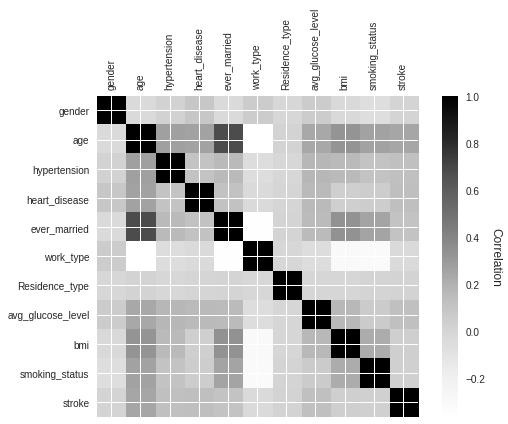

In [104]:
# Inter-feature Correlation

fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

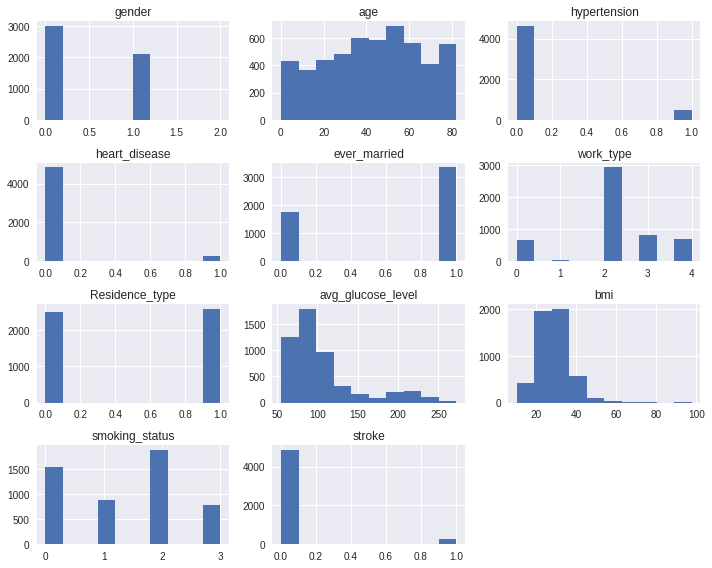

In [105]:
# Histogram of Features

fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

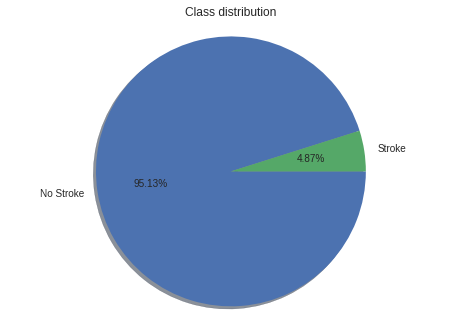

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [106]:
# Class (Target) Distribution

class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [107]:
# Handle Imbalanced Classes

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 10)
Shape of y: (9722,)


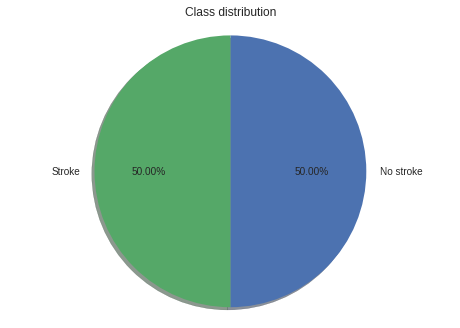

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [108]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [109]:
# Save the pre-processed dataset

clean_data.to_csv('stroke_prediction_preprocessed.csv')

In [110]:
# Data splitting

def split_train_test(X,y,test_size=0.3,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(X,y,test_size=0.3,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3402 | # class 1: 3403
[test]  # class 0: 1459 | # class 1: 1458


In [111]:
# Data Normalization

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# **2. MODELLING**

In [112]:
#function to evaluate a model
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

##**I. Random Forest**

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [114]:
# Evaluating the Random Forest Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9400068563592733
Precision: 0.9190071848465056
Recall: 0.9650205761316872
F1 Score: 0.9414519906323185
Area Under Curve: 0.9871463815248244
Confusion Matrix:
 [[1335  124]
 [  51 1407]]


##**II. Decision Tree**

In [115]:
from sklearn import tree

# Building Decision Tree model 
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [116]:
# Evaluating the Decision Tree Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

modelAcc = dt_eval['acc']

Accuracy: 0.8992115186835791
Precision: 0.8828947368421053
Recall: 0.9204389574759945
F1 Score: 0.9012760241773002
Area Under Curve: 0.8992187933370377
Confusion Matrix:
 [[1281  178]
 [ 116 1342]]


##**III. Logistic Regression**

In [117]:
from sklearn.linear_model import LogisticRegression

# Building Logistic Regression model 
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [118]:
# Evaluating the Logistic Regression Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.8004799451491258
Precision: 0.7840466926070039
Recall: 0.8292181069958847
F1 Score: 0.8059999999999999
Area Under Curve: 0.8850251642752848
Confusion Matrix:
 [[1126  333]
 [ 249 1209]]


##**IV. Naive Bayes**

In [119]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [120]:
# Evaluating the Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.7836818649297224
Precision: 0.7454005934718101
Recall: 0.8614540466392319
F1 Score: 0.7992363983455297
Area Under Curve: 0.8559769502195822
Confusion Matrix:
 [[1030  429]
 [ 202 1256]]


##**Model Comparison**

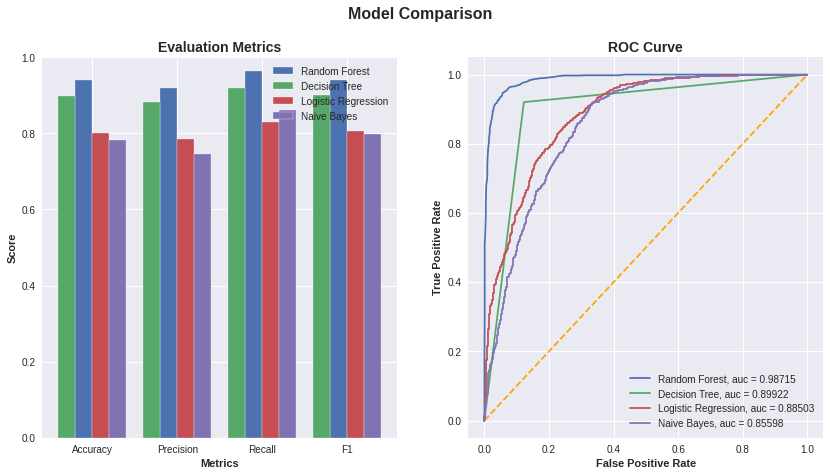

In [121]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]

## Set position of bar on x axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot([0, 1], [0, 1], color='orange', linestyle='--')
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# **4. OUTPUT**

In [122]:
#Saving the model
import joblib

stroke_pred_classification = {
    'model': dt,
}


joblib.dump(stroke_pred_classification, 'stroke_pred_classification.joblib')

['stroke_pred_classification.joblib']